In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Make data.
x = np.arange(0, 1, 0.0005)
y = np.arange(0, 1, 0.0005)

xy = np.array([x, y]).T
#x, y = np.meshgrid(x,y)

x   
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4 + np.random.normal(0, 0.1, x.shape)

z = FrankeFunction(x, y)
#z = z - np.mean(z)

def meanscaler(X):
    return X-np.mean(X, axis=0)

For polynomial degree: 1
RMSE = 0.20439274449344055
R2 = 0.7643621924564801

For polynomial degree: 2
RMSE = 0.19643836921664282
R2 = 0.7673590535214431

For polynomial degree: 3
RMSE = 0.1512661355656723
R2 = 0.8794135105766395

For polynomial degree: 4
RMSE = 0.11248133975431703
R2 = 0.9248840602382646

For polynomial degree: 5
RMSE = 0.11613148044591082
R2 = 0.924521306419317



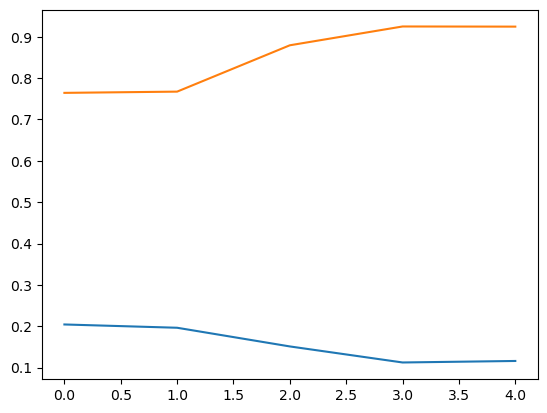

In [2]:
from sklearn.metrics import mean_squared_error, r2_score

maxdegree = 5

rmse = np.zeros(maxdegree)
r2 = np.copy(rmse)

for degree in range(1, maxdegree+1):
    poly3 = PolynomialFeatures(degree=degree)
    X = poly3.fit_transform(xy)

    X_train, X_test, z_train, z_test = train_test_split(X,z,test_size=0.2)

    scaler = preprocessing.StandardScaler()
    scaler.fit(X_train, z_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    clf3 = LinearRegression()
    clf3.fit(X_train_scaled, z_train)
    z_ = clf3.predict(X_test_scaled)

    rmse[degree-1] = (np.sqrt(mean_squared_error(z_test, z_)))
    r2[degree-1] = r2_score(z_test, z_)

    print(f"For polynomial degree: {degree}")
    print(f"RMSE = {rmse[degree-1]}")
    print(f"R2 = {r2[degree-1]}\n")

#print(np.linalg.eig(X))
#print(np.linalg.eig(X_train.T @ X_train))
#np.linalg.eig(np.matmul(XT, X_train)
plt.plot(np.arange(maxdegree), rmse)
plt.plot(np.arange(maxdegree), r2)

In [3]:
def sort_lists(list1, list2):
    zipped_lists = zip(list1, list2)
    sorted_pairs = sorted(zipped_lists)

    tuples = zip(*sorted_pairs)
    return [ list(tuple) for tuple in  tuples]

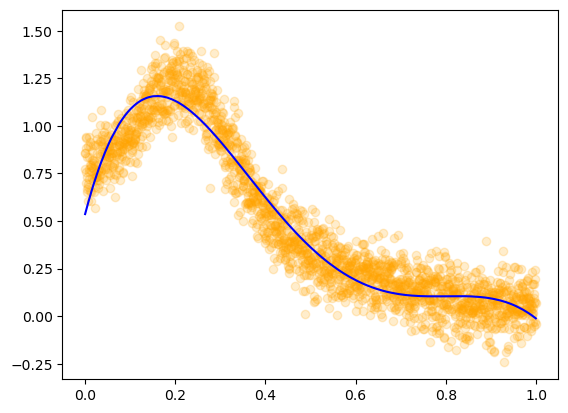

In [4]:
X_test[:, 1], z_ = sort_lists(X_test[:, 1], z_)
plt.scatter(x, z, c="orange", alpha=0.2)
plt.plot(X_test[:,1], z_, c="b")
X_test_1, z_1 = X_test[:, 1], z_

In [5]:
X = np.zeros((len(x), 1 + 2*maxdegree))
X[:, 0] = 1

for i in range(maxdegree):
    X[:, 2*i+1] = x**(i+1)
    X[:, 2*i+2] = y**(i+1)

In [6]:
def create_X(x, y, n):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2)     # Number of elements in beta
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)

    return X

In [7]:
def SVDinv(A):
    U, s, VT = np.linalg.svd(A)

    D = np.zeros((len(U),len(VT)))
    D = np.diag(s)
    UT = np.transpose(U); V = np.transpose(VT); invD = np.linalg.inv(D)
    return np.matmul(V,np.matmul(invD,UT))

In [8]:
X = create_X(x, y, maxdegree)

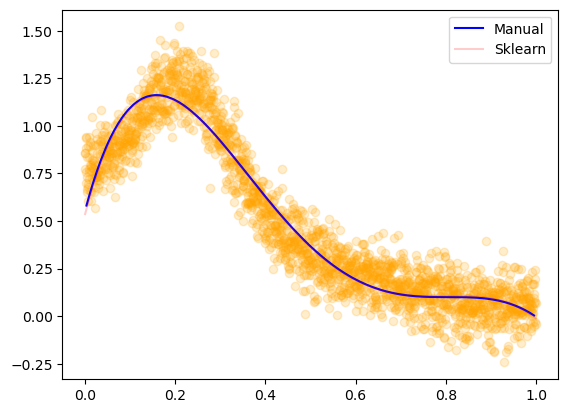

In [9]:
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)
#X_train = meanscaler(X_train)
#X_test_scaled = meanscaler(X_test)

def find_beta(X, z):
    XT = X.T
    XTXinv = np.linalg.pinv(np.matmul(XT, X))
    XTz = np.matmul(XT, z)
    beta = np.matmul(XTXinv, XTz)

    return beta

beta = find_beta(X_train, z_train)
z_ = X_test @ beta
            
X_test[:, 1], z_ = sort_lists(X_test[:, 1], z_)
plt.scatter(x, z, c="orange", alpha=0.2)
plt.plot(X_test[:,1], z_, c="b", label="Manual")
plt.plot(X_test_1, z_1, c="r", alpha=0.2, label="Sklearn")
plt.legend()

In [10]:
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model)**2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

print(f"RMSE = {np.sqrt(MSE(z_test, z_))}")
print(f"R2 = {R2(z_test, z_)}")
print(f"For polynomial degree: {maxdegree}")
rmse = (np.sqrt(mean_squared_error(z_test, z_)))
r2 = r2_score(z_test, z_)
print(f"RMSE = {rmse}")
print(f"R2 = {r2}\n")

RMSE = 0.5822376636407841
R2 = -0.9467068326978518
For polynomial degree: 5
RMSE = 0.5822376636407841
R2 = -0.9467068326978518



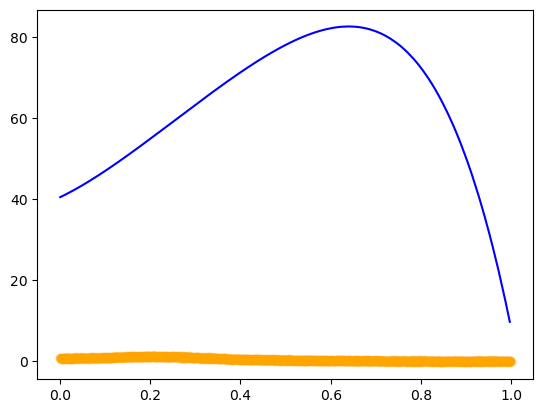

In [11]:
def SVDinv(A):
    ''' Takes as input a numpy matrix A and returns inv(A) based on singular value decomposition (SVD).
    SVD is numerically more stable than the inversion algorithms provided by
    numpy and scipy.linalg at the cost of being slower.
    '''
    U, s, VT = np.linalg.svd(A)


    D = np.zeros((len(U),len(VT)))
    D = np.diag(s)
    UT = np.transpose(U); V = np.transpose(VT); invD = np.linalg.inv(D)
    return np.matmul(V,np.matmul(invD,UT))

X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)

beta = X_train.T @ np.linalg.inv(X_train @ X_train.T) @ z_train

z_ = X_test @ beta
            
X_test[:, 1], z_ = sort_lists(X_test[:, 1], z_)
plt.scatter(x, z, c="orange", alpha=0.2)
plt.plot(X_test[:,1], z_, c="b")

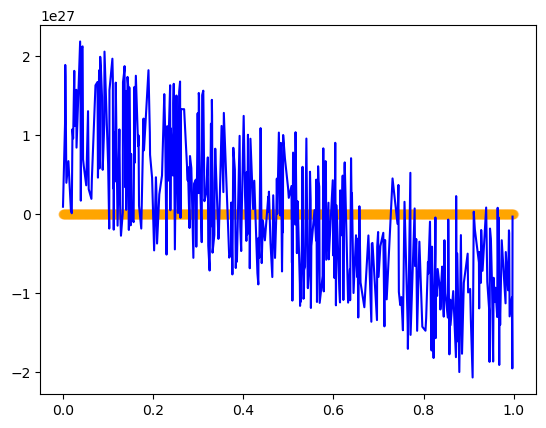

In [12]:
U, S, Vt = np.linalg.svd(X_train, full_matrices=False)

# solve Ax = b for the best possible approximate solution in terms of least squares
beta = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ z_train

z_ = X_test @ beta
            
X_test[:, 1], z_ = sort_lists(X_test[:, 1], z_)
plt.scatter(x, z, c="orange", alpha=0.2)
plt.plot(X_test[:,1], z_, c="b")

## Bootstrap del c

In [13]:
def bootstrap_resampling(data, X):
    B = len(data)
    print(B)
    temp_data = np.zeros(B)
    X_temp = np.zeros(np.shape(X))
    for i in range(B):
        selection = np.random.randint(0, B, B)
        temp_data[i] = np.mean(data[selection])
        X_temp[:, i] = X[selection]
        
    return temp_data, X_temp

In [14]:
from sklearn.utils import resample

poly3 = PolynomialFeatures(degree=5)
X = poly3.fit_transform(xy)
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)

B = len(z_train)
z_ = np.zeros([len(z_test), B])
for i in range(B):
    X_train_boot, z_train_boot = resample(X_train, z_train)
    
    z_[:, i] = clf3.fit(X_train, z_train).predict(X_test)

Error: 0.015236194314592298
Bias^2: 0.3515141245624992
Var: 1.6411330538609735e-32
0.015236194314592298 >= 0.3515141245624992 + 1.6411330538609735e-32 = 0.3515141245624992


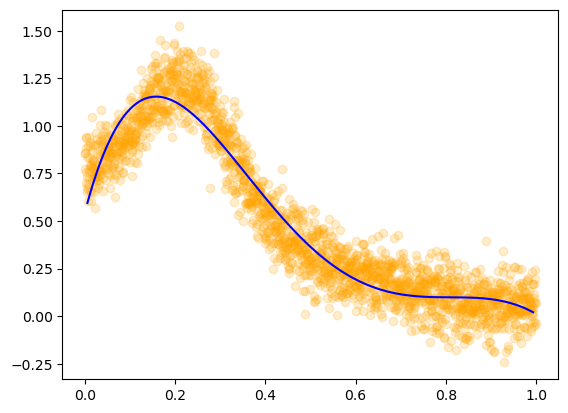

In [15]:
error = np.mean( np.mean((z_test - z_[:, -1])**2)) #, axis=1, keepdims=True) )
bias = np.mean( (z_test - np.mean(z_, axis=1, keepdims=True))**2 )
variance = np.mean( np.var(z_, axis=1, keepdims=True) )
print('Error:', error)
print('Bias^2:', bias)
print('Var:', variance)
print('{} >= {} + {} = {}'.format(error, bias, variance, bias+variance))
X_test[:, 1], z_[:, -1] = sort_lists(X_test[:, 1], z_[:, -1])
plt.scatter(x, z, c="orange", alpha=0.2)
plt.plot(X_test[:,1], z_[:,-1], c="b")

In [16]:
def bootstrap(feature, data):
    n = len(data)
    data_temp = np.zeros(n)
    feature_temp = np.zeros(n)
    indices = np.random.randint(0, n, n)
    data_temp = np.mean(data[indices])
    feature_temp = np.mean(feature[indices], axis=0)
    return feature_temp, data_temp

(1600, 21)
MSE = 0.3376428815035482
R2 = -0.8458098775114227
For polynomial degree: 5
MSE = 0.3376428815035482
R2 = -0.8458098775114227



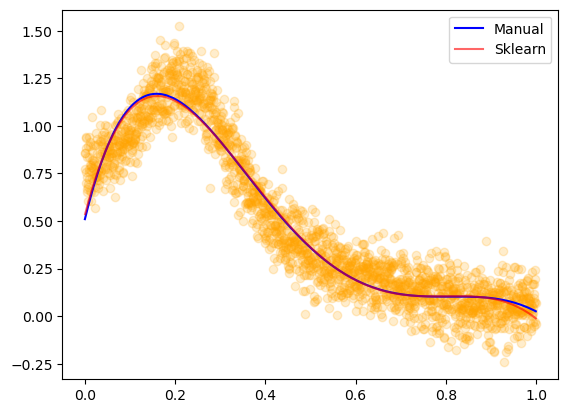

In [17]:
X = create_X(x, y, maxdegree)
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)

B = len(z_train)
z_train_boot = np.zeros(B)
print(np.shape(X_train))
for i in range(B):
    X_train_boot[i], z_train_boot[i] = bootstrap(X_train, z_train)


beta = find_beta(X_train_boot, z_train_boot)
z_ = X_test @ beta
            
X_test[:, 1], z_ = sort_lists(X_test[:, 1], z_)
plt.scatter(x, z, c="orange", alpha=0.2)
plt.plot(X_test[:,1], z_, c="b", label="Manual")
plt.plot(X_test_1, z_1, c="r", alpha=0.6, label="Sklearn")
plt.legend()

print(f"MSE = {MSE(z_test, z_)}")
print(f"R2 = {R2(z_test, z_)}")
print(f"For polynomial degree: {maxdegree}")
rmse = (np.sqrt(mean_squared_error(z_test, z_)))
r2 = r2_score(z_test, z_)
print(f"MSE = {rmse**2}")
print(f"R2 = {r2}\n")

## Cross-validation part d

In [18]:
def cross_validation(feature, data, kfolds, test_size = 0.2):
    test_size = int(1/test_size)
    n = len(data)
    indices = np.random.randint(0, n, n)
    scores = np.zeros(kfolds)
    
    fold_len = int(n/kfolds)
    feature_train = np.zeros([(test_size-1)*fold_len, len(feature[0])])
    data_train = np.zeros((test_size-1)*fold_len)
    feature_test = np.zeros([fold_len, len(feature[0])])
    data_test = np.zeros(fold_len)
    feature_best = np.copy(feature_test)
    data_best = np.copy(data_train)
    for i in range(kfolds):
        #fold_indices = indices[i*fold_len:(i+(test_size-1))*fold_len]
        fold_indices = indices[:(kfolds-1)*fold_len]
        
        feature_train = feature[fold_indices]
        data_train = data[fold_indices]
        
        test_fold_indices = indices[(kfolds-1)*fold_len:]
        
        feature_test = feature[test_fold_indices]
        data_test = data[test_fold_indices]
        
        beta = find_beta(feature_train, data_train)
        data_ = feature_test @ beta
        scores[i] = MSE(data_test, data_)
        if i > 0:
            if scores[i] < scores[:i].min():
                feature_best = feature_test
                data_best = data_
        else:
            feature_best = feature_test
            data_best = data_
        
        indices = np.roll(indices, fold_len)
        
    return scores, data_best, feature_best

MSE [CV] = 0.012970146173904356
MSE [Bootstrap]= 0.3376428815035482


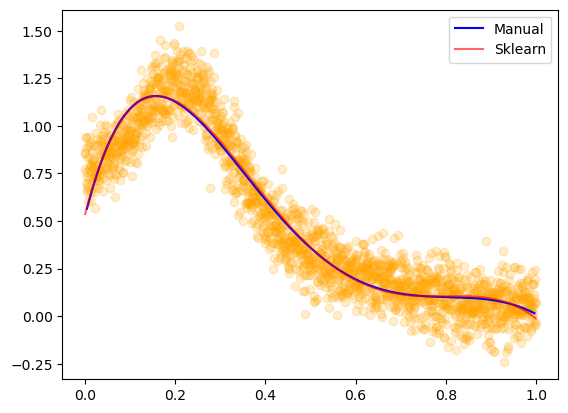

In [19]:
X = create_X(x, y, maxdegree)
kfolds = 5

scores, z_, X_test = cross_validation(X, z, kfolds)
print(f"MSE [CV] = {scores.min()}")
print(f"MSE [Bootstrap]= {rmse**2}")

X_test[:, 1], z_ = sort_lists(X_test[:, 1], z_)
plt.scatter(x, z, c="orange", alpha=0.2)
plt.plot(X_test[:,1], z_, c="b", label="Manual")
plt.plot(X_test_1, z_1, c="r", alpha=0.6, label="Sklearn")
plt.legend()

## Ridge regression part e

In [20]:
def cross_validation(feature, data, kfolds, lmbda, find_beta, test_size = 0.2):
    test_size = int(1/test_size)
    n = len(data)
    indices = np.random.randint(0, n, n)
    scores = np.zeros(kfolds)
    
    fold_len = int(n/kfolds)
    feature_train = np.zeros([(test_size-1)*fold_len, len(feature[0])])
    data_train = np.zeros((test_size-1)*fold_len)
    feature_test = np.zeros([fold_len, len(feature[0])])
    data_test = np.zeros(fold_len)
    feature_best = np.copy(feature_test)
    data_best = np.copy(data_train)
    for i in range(kfolds):
        #fold_indices = indices[i*fold_len:(i+(test_size-1))*fold_len]
        fold_indices = indices[:(kfolds-1)*fold_len]
        
        feature_train = feature[fold_indices]
        data_train = data[fold_indices]
        
        test_fold_indices = indices[(kfolds-1)*fold_len:]
        
        feature_test = feature[test_fold_indices]
        data_test = data[test_fold_indices]
        
        beta = find_beta(feature_train, data_train, lmbda)
        data_ = feature_test @ beta
        scores[i] = MSE(data_test, data_)
        if i > 0:
            if scores[i] < scores[:i].min():
                feature_best = feature_test
                data_best = data_
        else:
            feature_best = feature_test
            data_best = data_
        
        indices = np.roll(indices, fold_len)
        
    return scores, data_best, feature_best

In [21]:
def ridge_regression(X, z, lmbda):
    XT = X.T
    XTX = np.matmul(XT, X)
    XTXinv = np.linalg.pinv( XTX + lmbda*np.eye(len(XTX)))
    XTz = np.matmul(XT, z)
    beta = np.matmul(XTXinv, XTz)

    return beta

MSE [CV w/o Ridge] = 0.012970146173904356
MSE [CV w/ Ridge] = 0.013261648680736711


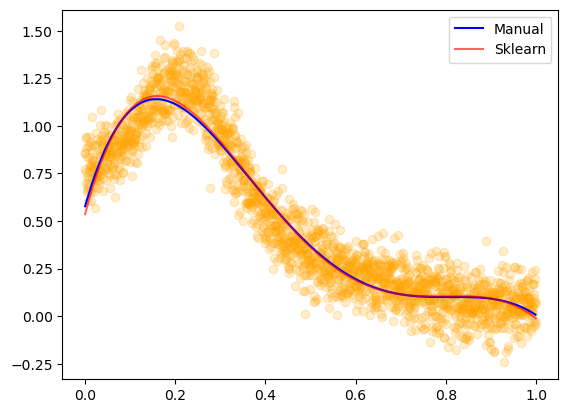

In [23]:
N = 5
lmbda = np.logspace(-4, 4, N)
X = create_X(x, y, maxdegree)
kfolds = 5
n_datapoints = len(X)
n_features = len(X[0])

print(f"MSE [CV w/o Ridge] = {scores.min()}")

scores = np.zeros((N, kfolds))
z_ = np.zeros((N, int(n_datapoints/kfolds)))
X_test = np.zeros((N, int(n_datapoints/kfolds), n_features))
min_i = 0
for i, lmbda_ in enumerate(lmbda):
    scores[i], z_[i], X_test[i] = cross_validation(X, z, kfolds, lmbda_, ridge_regression)
    if i > 0:
        if scores[i].min() < prev_min:
            prev_min = scores[i].min()
            min_i = i
    else:
        prev_min = scores[i].min()
        
X_test = X_test[min_i]
z_ = z_[min_i]

print(f"MSE [CV w/ Ridge] = {scores.min()}")
    
X_test[:, 1], z_ = sort_lists(X_test[:, 1], z_)
plt.scatter(x, z, c="orange", alpha=0.2)
plt.plot(X_test[:,1], z_, c="b", label="Manual")
plt.plot(X_test_1, z_1, c="r", alpha=0.6, label="Sklearn")
plt.legend()

In [24]:
from sklearn import linear_model
def lasso_regression(X, z, lmbda):
    RegLasso = linear_model.Lasso(lmbda, fit_intercept=False)
    RegLasso.fit(X, z)
    return RegLasso.coef_

MSE [CV w/o Ridge] = 0.012828922821115942
RMSE [CV w/ Ridge] = 0.10972308468175039


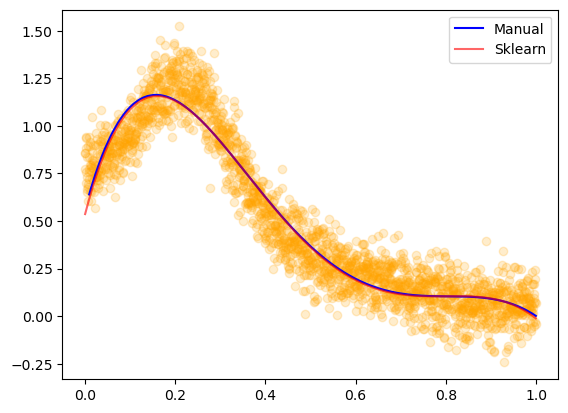

In [28]:
N = 5
lmbda = np.logspace(-4, 2, N)
X = create_X(x, y, maxdegree)
kfolds = 5
n_datapoints = len(X)
n_features = len(X[0])

print(f"MSE [CV w/o Ridge] = {scores.min()}")

scores = np.zeros((N, kfolds))
z_ = np.zeros((N, int(n_datapoints/kfolds)))
X_test = np.zeros((N, int(n_datapoints/kfolds), n_features))
min_i = 0
for i, lmbda_ in enumerate(lmbda):
    scores[i], z_[i], X_test[i] = cross_validation(X, z, kfolds, lmbda_, ridge_regression)
    if i > 0:
        if scores[i].min() < prev_min:
            prev_min = scores[i].min()
            min_i = i
    else:
        prev_min = scores[i].min()
        
X_test = X_test[min_i]
z_ = z_[min_i]

print(f"RMSE [CV w/ Ridge] = {np.sqrt(scores.min())}")
    
X_test[:, 1], z_ = sort_lists(X_test[:, 1], z_)
plt.scatter(x, z, c="orange", alpha=0.2)
plt.plot(X_test[:,1], z_, c="b", label="Manual")
plt.plot(X_test_1, z_1, c="r", alpha=0.6, label="Sklearn")
plt.legend()